# CHM13 rDNA ARRAY ANNOTATION INFORMATION

rDNA array information does not exist in hg38 so this is unique to CHM13!

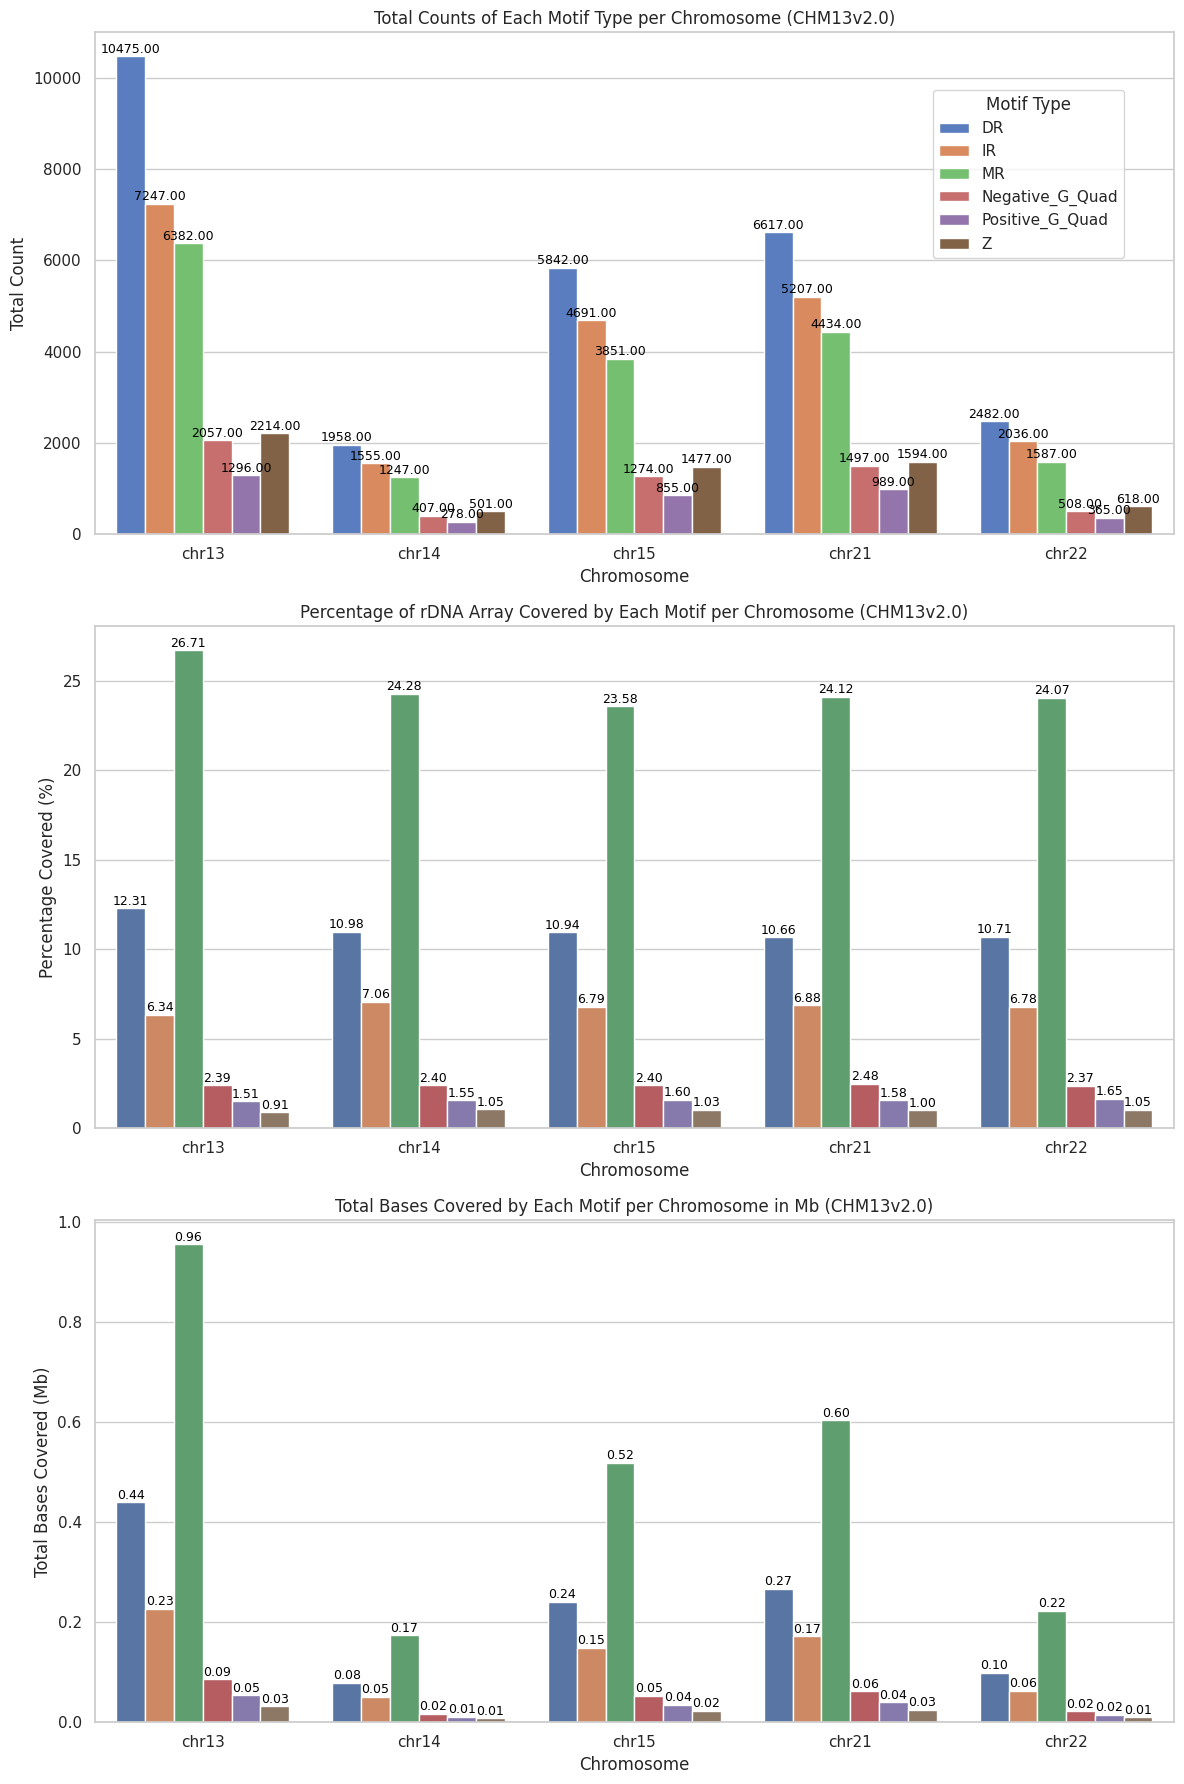

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the existing data from the CSV file
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/chm13ref_collapsed_summary_metrics_rdna_chr.csv'
data = pd.read_csv(file_path)

# Extract the chromosome information from the 'Sample_Haplotype_Chromosome' column
data['Chromosome'] = data['Sample_Haplotype_Chromosome'].apply(lambda x: x.split('|')[1].split('_')[0])

# Load the new CSV data
additional_data_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/chm13_quadron_collapsed_summary_metrics_rdna.csv'  # Replace with your actual file path
additional_data = pd.read_csv(additional_data_path)
additional_data['Chromosome'] = additional_data['Sample_Haplotype'].apply(lambda x: x.split('_')[0])

# Concatenate the existing data with the new data
full_data = pd.concat([data, additional_data], ignore_index=True)

# Group by Chromosome and Motif Type, then calculate the sum of counts and base coverage
grouped_data = full_data.groupby(['Chromosome', 'Motif Type']).agg({
    'Total Count': 'sum',
    'Total Bases Covered': 'sum'
}).reset_index()

# Define the total lengths of the rDNA arrays for each chromosome
lengths = {
    'chr13': 3577493,
    'chr14': 718274,
    'chr15': 2201043,
    'chr21': 2504417,
    'chr22': 926856
}

# Calculate the percentage of rDNA array covered by each motif
grouped_data['Percentage of rDNA Covered'] = grouped_data.apply(
    lambda x: (x['Total Bases Covered'] / lengths[x['Chromosome']]) * 100, axis=1)

# Convert Total Bases Covered to megabases
grouped_data['Total Bases Covered (Mb)'] = grouped_data['Total Bases Covered'] / 1e6

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting figures
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Bar plot for the total counts
total_count_plot = sns.barplot(ax=ax1, x='Chromosome', y='Total Count', hue='Motif Type', data=grouped_data, palette='muted')
ax1.set_title('Total Counts of Each Motif Type per Chromosome (CHM13v2.0)')
ax1.set_xlabel('Chromosome')
ax1.set_ylabel('Total Count')

# Bar plot for the percentage of rDNA covered
percentage_cover_plot = sns.barplot(ax=ax2, x='Chromosome', y='Percentage of rDNA Covered', hue='Motif Type', data=grouped_data, palette='deep')
ax2.set_title('Percentage of rDNA Array Covered by Each Motif per Chromosome (CHM13v2.0)')
ax2.set_xlabel('Chromosome')
ax2.set_ylabel('Percentage Covered (%)')

# Bar plot for the total bases covered in Mb
total_bases_covered_plot = sns.barplot(ax=ax3, x='Chromosome', y='Total Bases Covered (Mb)', hue='Motif Type', data=grouped_data, palette='deep')
ax3.set_title('Total Bases Covered by Each Motif per Chromosome in Mb (CHM13v2.0)')
ax3.set_xlabel('Chromosome')
ax3.set_ylabel('Total Bases Covered (Mb)')

# Adjusting legends and annotations
for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        text = f'{p.get_height():.2f}'
        if p.get_height() > 0:
            ax.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
    ax.get_legend().remove()

# Create a single legend for all plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Motif Type', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout()
plt.show()


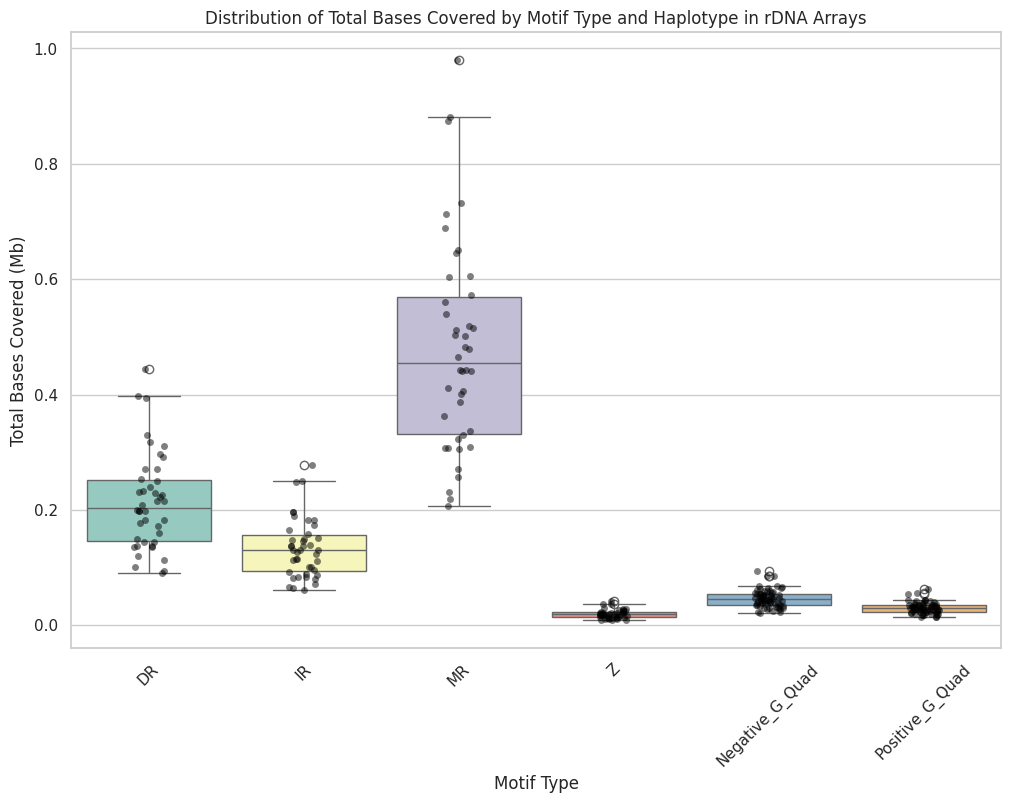

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
chromosomes = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load and concatenate all CSVs
for chromosome in chromosomes:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    # Extract haplotype info with a more flexible regex pattern
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d)')[0]
    if rdna_df['Sample_Haplotype'].isnull().all():
        # Attempt a more generic pattern if the specific one fails
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Motif Type', 'Total Bases Covered']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    data_list.append(quadron_df[['Sample_Haplotype', 'Motif Type', 'Total Bases Covered']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Sum the total bases covered for each haplotype and motif type
summed_data = data.groupby(['Sample_Haplotype', 'Motif Type']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', data=summed_data, palette='Set3', dodge=False)
sns.stripplot(x='Motif Type', y='Total Bases Covered (Mb)', data=summed_data, color='black', jitter=True, alpha=0.5, dodge=False)
plt.title('Distribution of Total Bases Covered by Motif Type and Haplotype in rDNA Arrays')
plt.xlabel('Motif Type')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


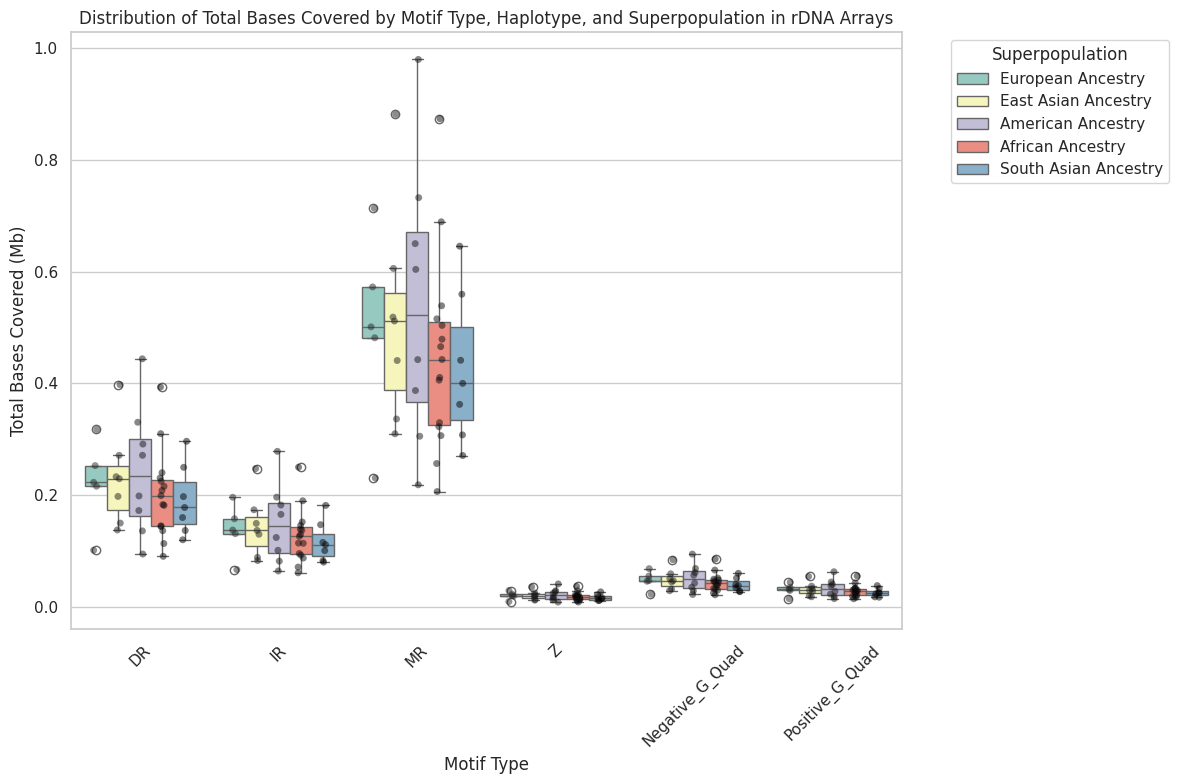

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Update this with the actual path to your metadata file
chromosomes = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load and concatenate all CSVs
for chromosome in chromosomes:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d)')[0]
    if rdna_df['Sample_Haplotype'].isnull().all():
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    rdna_df['Sample'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    quadron_df['Sample'] = quadron_df['Sample_Haplotype'].str.extract(r'(HG\d+)')[0]
    data_list.append(quadron_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Merge metadata with the data
merged_data = pd.merge(data, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Sum the total bases covered for each haplotype, motif type, and superpopulation
summed_data = merged_data.groupby(['Sample_Haplotype', 'Motif Type', 'Superpopulation name']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Superpopulation name', data=summed_data, palette='Set3', dodge=True)
sns.stripplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Superpopulation name', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)

# Remove duplicate entries in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Superpopulation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Total Bases Covered by Motif Type, Haplotype, and Superpopulation in rDNA Arrays')
plt.xlabel('Motif Type')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


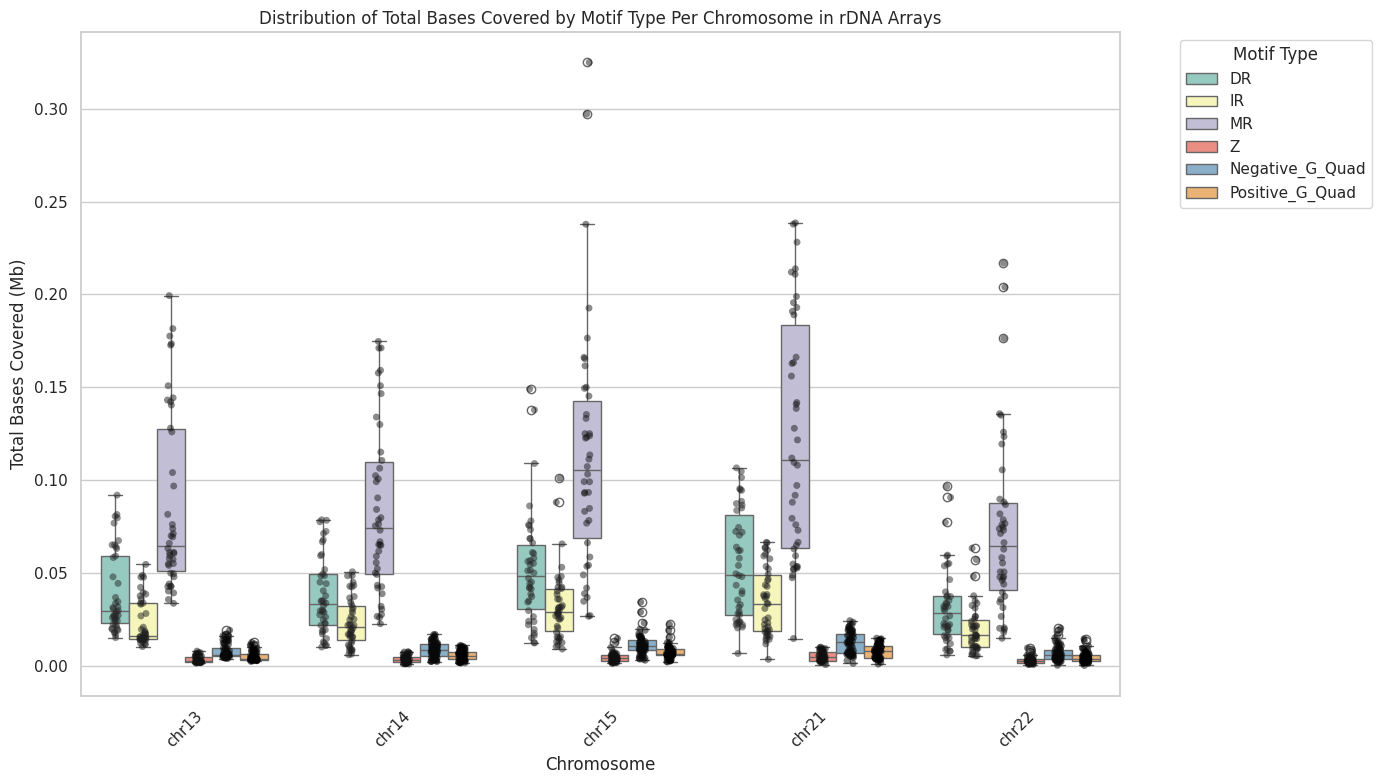

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Path to your metadata file
chromosomes_of_interest = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load and concatenate all CSVs
for chromosome in chromosomes_of_interest:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d)')[0]
    rdna_df['Chromosome'] = chromosome  # Directly assign the chromosome from the file path
    if rdna_df['Sample_Haplotype'].isnull().all():
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    rdna_df['Sample'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    quadron_df['Sample'] = quadron_df['Sample_Haplotype'].str.extract(r'(HG\d+)')[0]
    quadron_df['Chromosome'] = chromosome
    data_list.append(quadron_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Merge metadata with the data
merged_data = pd.merge(data, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Sum the total bases covered for each haplotype, motif type, and chromosome
summed_data = merged_data.groupby(['Sample_Haplotype', 'Motif Type', 'Chromosome']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x='Chromosome', y='Total Bases Covered (Mb)', hue='Motif Type', data=summed_data, palette='Set3', dodge=True)
sns.stripplot(x='Chromosome', y='Total Bases Covered (Mb)', hue='Motif Type', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)
plt.title('Distribution of Total Bases Covered by Motif Type Per Chromosome in rDNA Arrays')
plt.xlabel('Chromosome')
plt.ylabel('Total Bases Covered (Mb)')
plt.legend(title='Motif Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


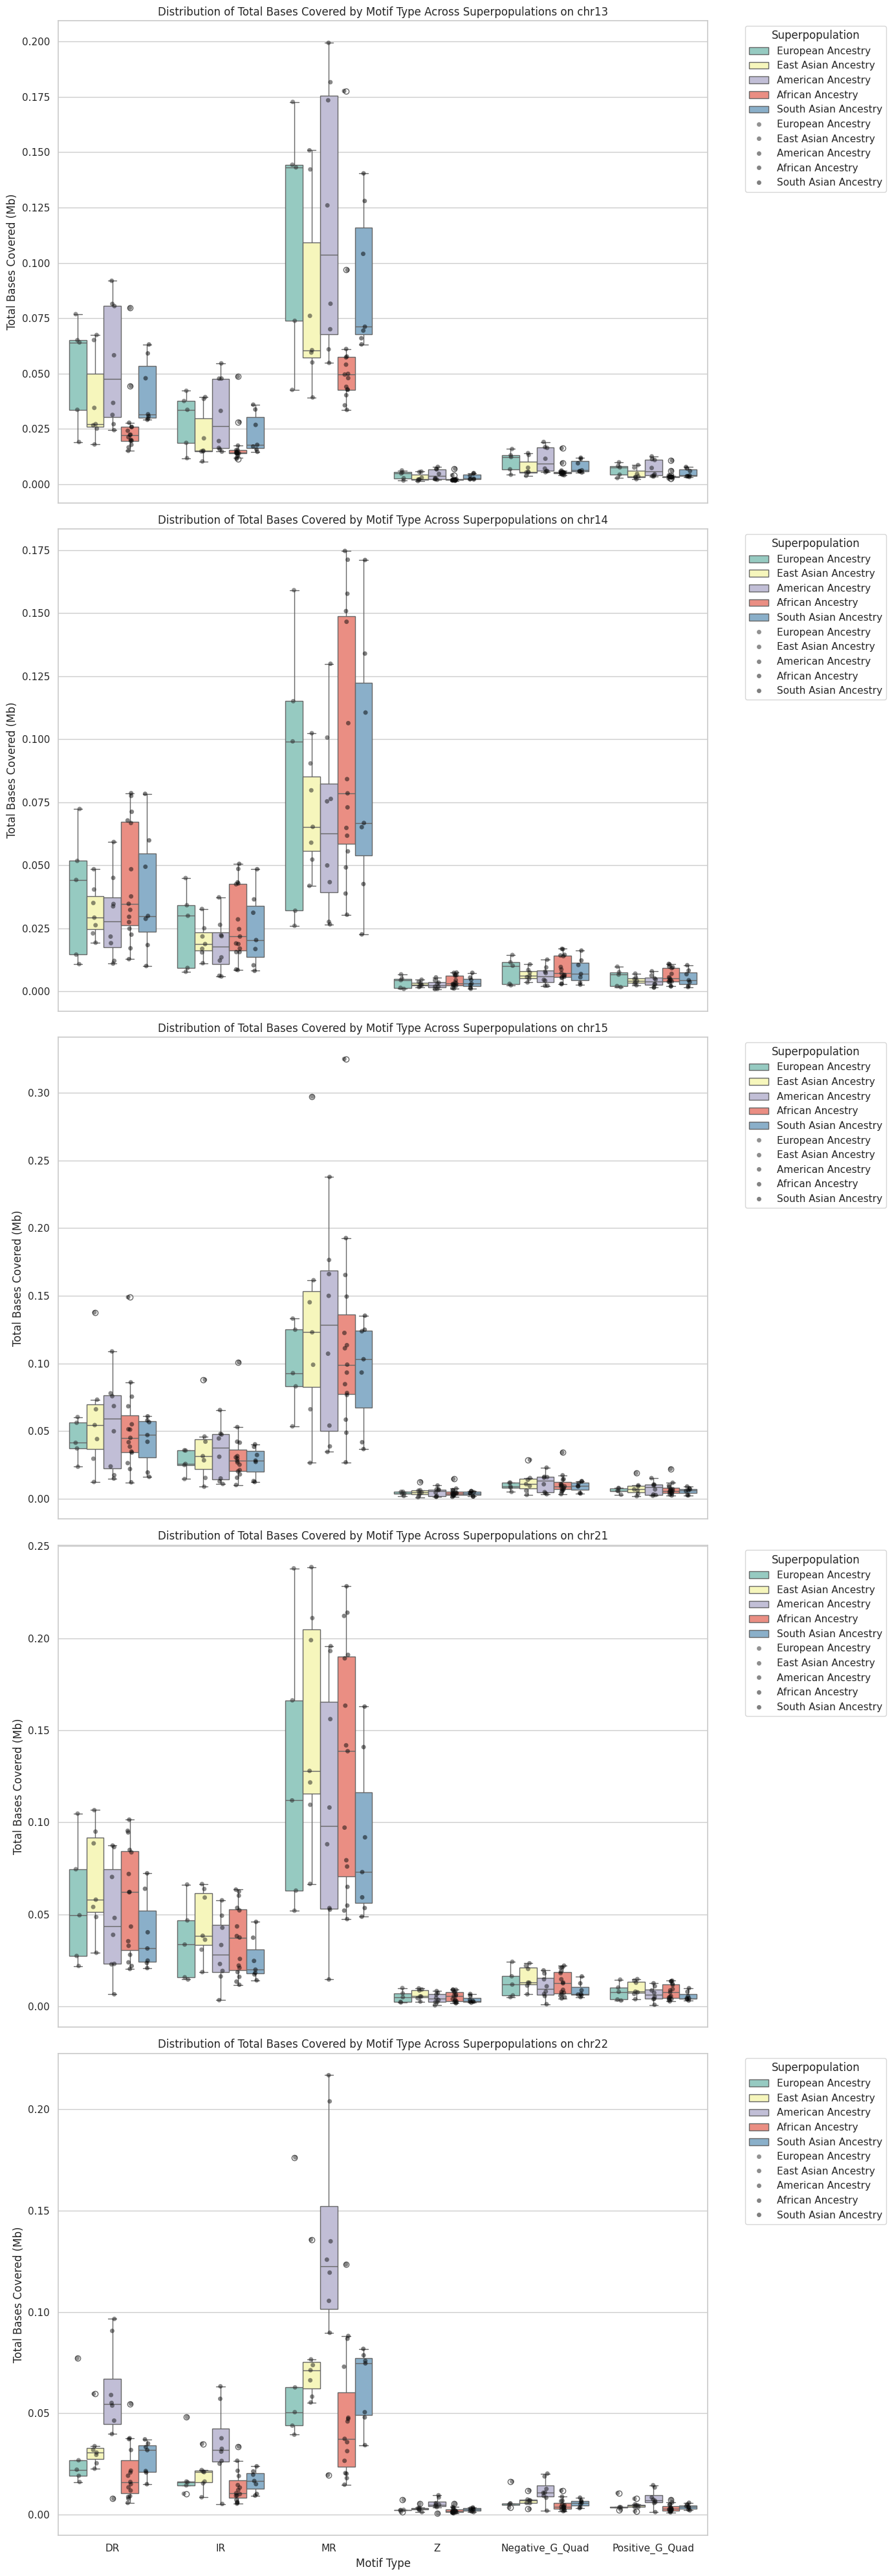

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Path to your metadata file
chromosomes_of_interest = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load and concatenate all CSVs
for chromosome in chromosomes_of_interest:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d)')[0]
    rdna_df['Chromosome'] = chromosome
    if rdna_df['Sample_Haplotype'].isnull().all():
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    rdna_df['Sample'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    quadron_df['Sample'] = quadron_df['Sample_Haplotype'].str.extract(r'(HG\d+)')[0]
    quadron_df['Chromosome'] = chromosome
    data_list.append(quadron_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Merge metadata with the data
merged_data = pd.merge(data, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Sum the total bases covered for each haplotype, motif type, and chromosome
summed_data = merged_data.groupby(['Sample_Haplotype', 'Motif Type', 'Chromosome', 'Superpopulation name']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Plotting
fig, axes = plt.subplots(nrows=len(chromosomes_of_interest), figsize=(14, 8 * len(chromosomes_of_interest)), sharex=True)
for ax, chromosome in zip(axes, chromosomes_of_interest):
    sns.boxplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Superpopulation name', data=summed_data[summed_data['Chromosome'] == chromosome], palette='Set3', dodge=True, ax=ax)
    sns.stripplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Superpopulation name', data=summed_data[summed_data['Chromosome'] == chromosome], palette='dark:black', jitter=True, alpha=0.5, dodge=True, ax=ax)
    ax.set_title(f'Distribution of Total Bases Covered by Motif Type Across Superpopulations on {chromosome}')
    ax.set_xlabel('Motif Type')
    ax.set_ylabel('Total Bases Covered (Mb)')
    ax.legend(title='Superpopulation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
